In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Linear model(Hypothesis)
def h(x, w, b):
  return w * x + b

def loss(y, x, w, b):
  o = h(x, w, b)
  e = 0.5 * (y - o) * (y - o)
  return e

def diff_loss(y, x, w, b):
  delta = 1e-4
  gw = (loss(y, x, w+delta, b) - loss(y, x, w-delta, b)) / (2*delta)
  gb = (loss(y, x, w, b+delta) - loss(y, x, w-delta, b)) / (2*delta)
  return gw, gb

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home + 'pollution.csv') #데이터 파일 이름
## x, y를 shuffle을 시키고, {학습, 검증, 테스트}용 데이터셋을 분리해야함.
x = lin_data['input'].to_numpy() #feature
y = lin_data['pollution'].to_numpy() #label

wc, bc = 10, 10
w_sgd = [wc]
b_sgd = [bc]
mse_history = [loss(y, x, wc, bc).sum()]
eta = 0.15

#Stochastic GDA
for epoch in range(30):
  for n in range(lin_data['input'].count()):
    gw, gc = diff_loss(y[n], x[n], wc, bc)
    wc = wc - eta * gw
    bc = bc - eta * gc
    w_sgd.append(wc)
    b_sgd.append(bc)
    o = h(x, wc, bc)
    mse_history.append(np.average(np.square(y - o)))

print("w, c = ({0:.04f}, {1:.04f})".format(wc, bc))

w = [-4.5445]
b = [5.1755]

w, c = (-4.4754, 5.2170)


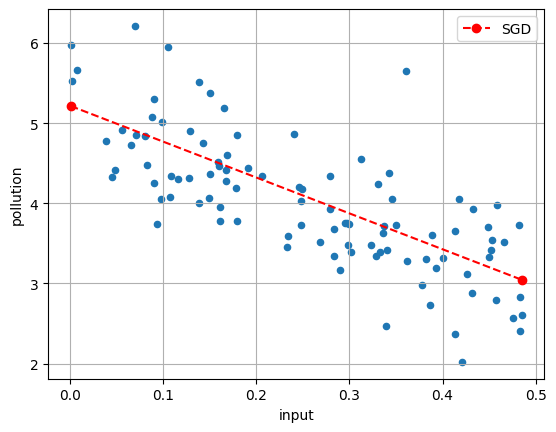

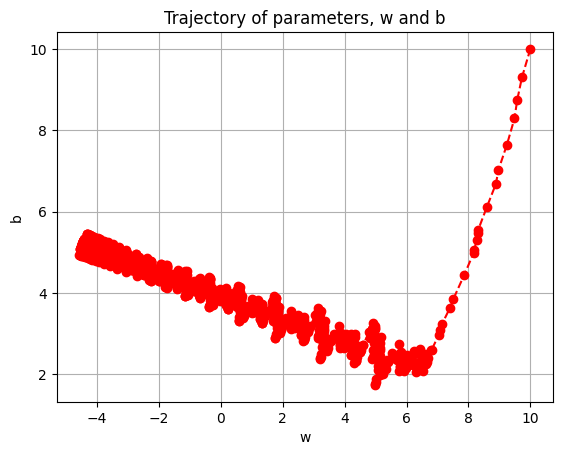

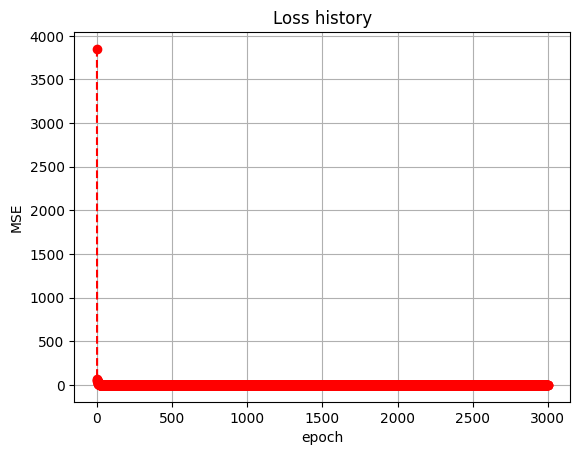

In [10]:
x0 = lin_data['input'].min()
x1 = lin_data['input'].max()

lin_data.plot(kind = 'scatter', x = 'input', y ='pollution')
plt.plot ([x0, x1], [h(x0, wc, bc), h(x1, wc, bc)], 'ro--', label = 'SGD')

plt.grid()
plt.legend()
plt.show()

plt.plot(w_sgd, b_sgd, 'ro--')
plt.xlabel('w')
plt.ylabel('b')
plt.title('Trajectory of parameters, w and b')
plt.grid()
plt.show()

plt.plot(mse_history, 'ro--')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.title('Loss history')
plt.grid()
plt.show()